In [1]:
# Artificial Neural Network

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
path='https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv'
dataset = pd.read_csv(path)
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [11]:
# Initialising the ANN
classifier = Sequential()


In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))

In [15]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))

In [16]:
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

In [19]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 6ms/step - loss: 0.9595 - accuracy: 0.3950 - val_loss: 0.6321 - val_accuracy: 0.7327
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5619 - accuracy: 0.7910 - val_loss: 0.5075 - val_accuracy: 0.7978
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4704 - accuracy: 0.8044 - val_loss: 0.4485 - val_accuracy: 0.8129
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4248 - accuracy: 0.8252 - val_loss: 0.4244 - val_accuracy: 0.8201
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4039 - accuracy: 0.8298 - val_loss: 0.4133 - val_accuracy: 0.8236
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8360 - val_loss: 0.4042 - val_accuracy: 0.8277
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8373 - val_loss: 0.3961 - val_accuracy: 0.8281

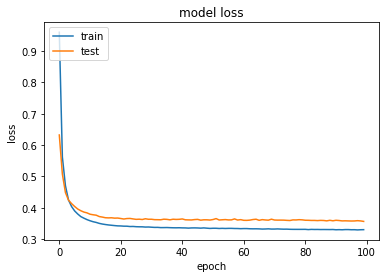

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1516,   79],
       [ 199,  206]])

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.861